In [2]:
import os
import sys
sys.path.append(os.getcwd() + '/src')
from nodes import *
from visualizer.individualvisualizer import IndividualVisualizer
from ea import EA
from train import eval
import pdb
import pickle
import gym
from history import History
#pdb.set_trace()


0


In [3]:
hist = History()
hist.load('out/Pendulum-v0404')

In [25]:
from analyzer import *
a = Analyzer(hist)
modularity = []
for i in range(len(hist.bests)):
    nn = hist.bests[i].execute()
    nn.compile()
    modularity.append(a.Q_metric(i))

Text(0.5, 0, 'Fitness')

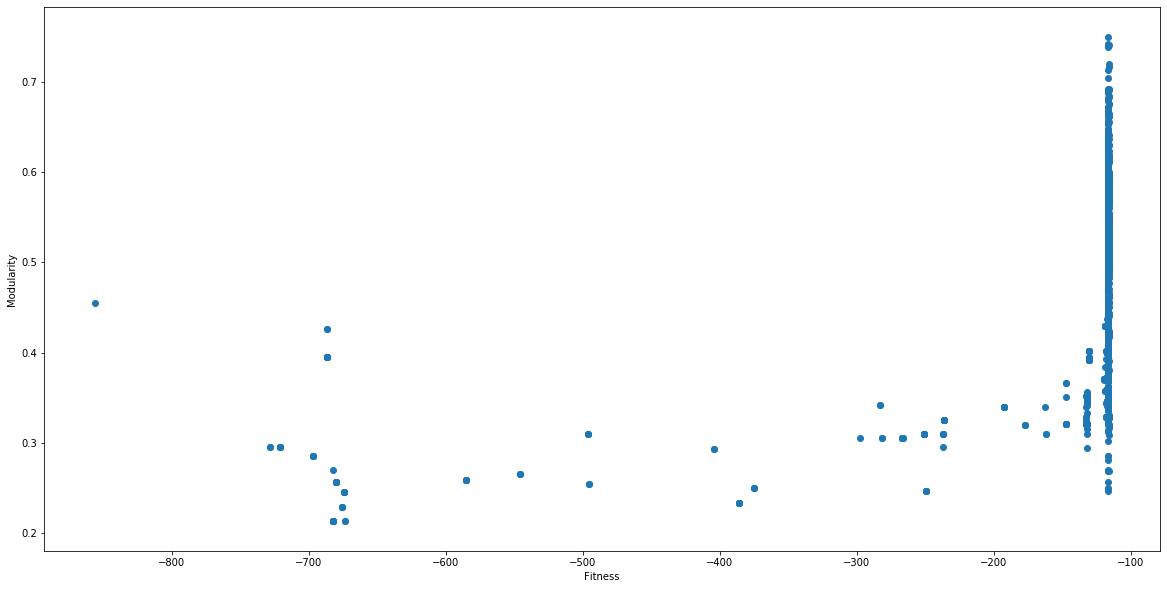

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.scatter(hist.fitnesses, modularity)
plt.ylabel('Modularity')
plt.xlabel('Fitness')
#plt.plot(modularity)

In [4]:
task = hist.tasks[0]
i = -1
env = gym.make(task)
seed = hist.seeds[i]
seed = [0,1,2,3,4,5]
hist.bests[i].compile()
nn = hist.bests[i].execute()
np.mean(eval((nn, task, seed),render=True))

/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


-252.0

AttributeError: 'FeedForward' object has no attribute 'nodeNames'

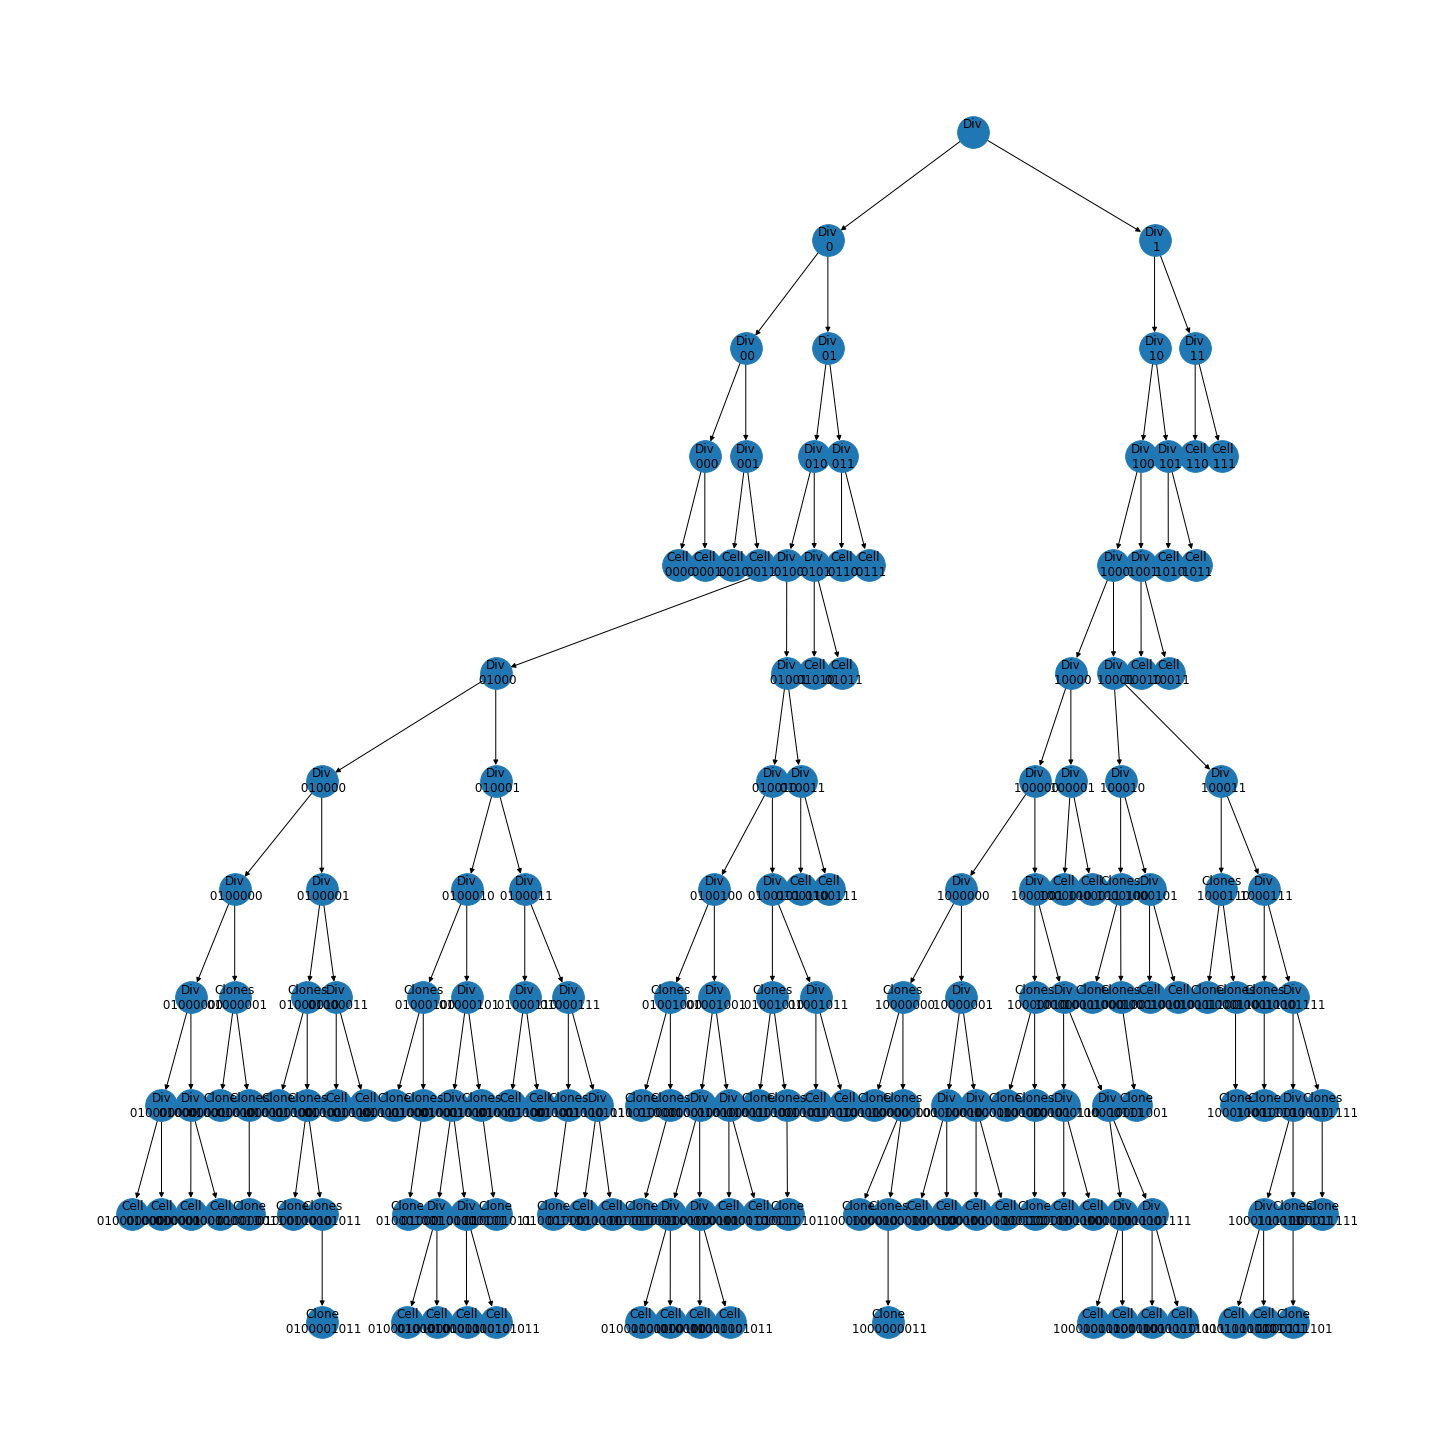

In [27]:
r1 = hist.bests[-1]
r2 = hist.bests[-1]
v1 = IndividualVisualizer(r1)
v2 = IndividualVisualizer(r2)
r1.compile()
r2.compile()
v1.draw_tree('test_tree_local1.png')
v1.draw_nn('test_nn_local1.png')

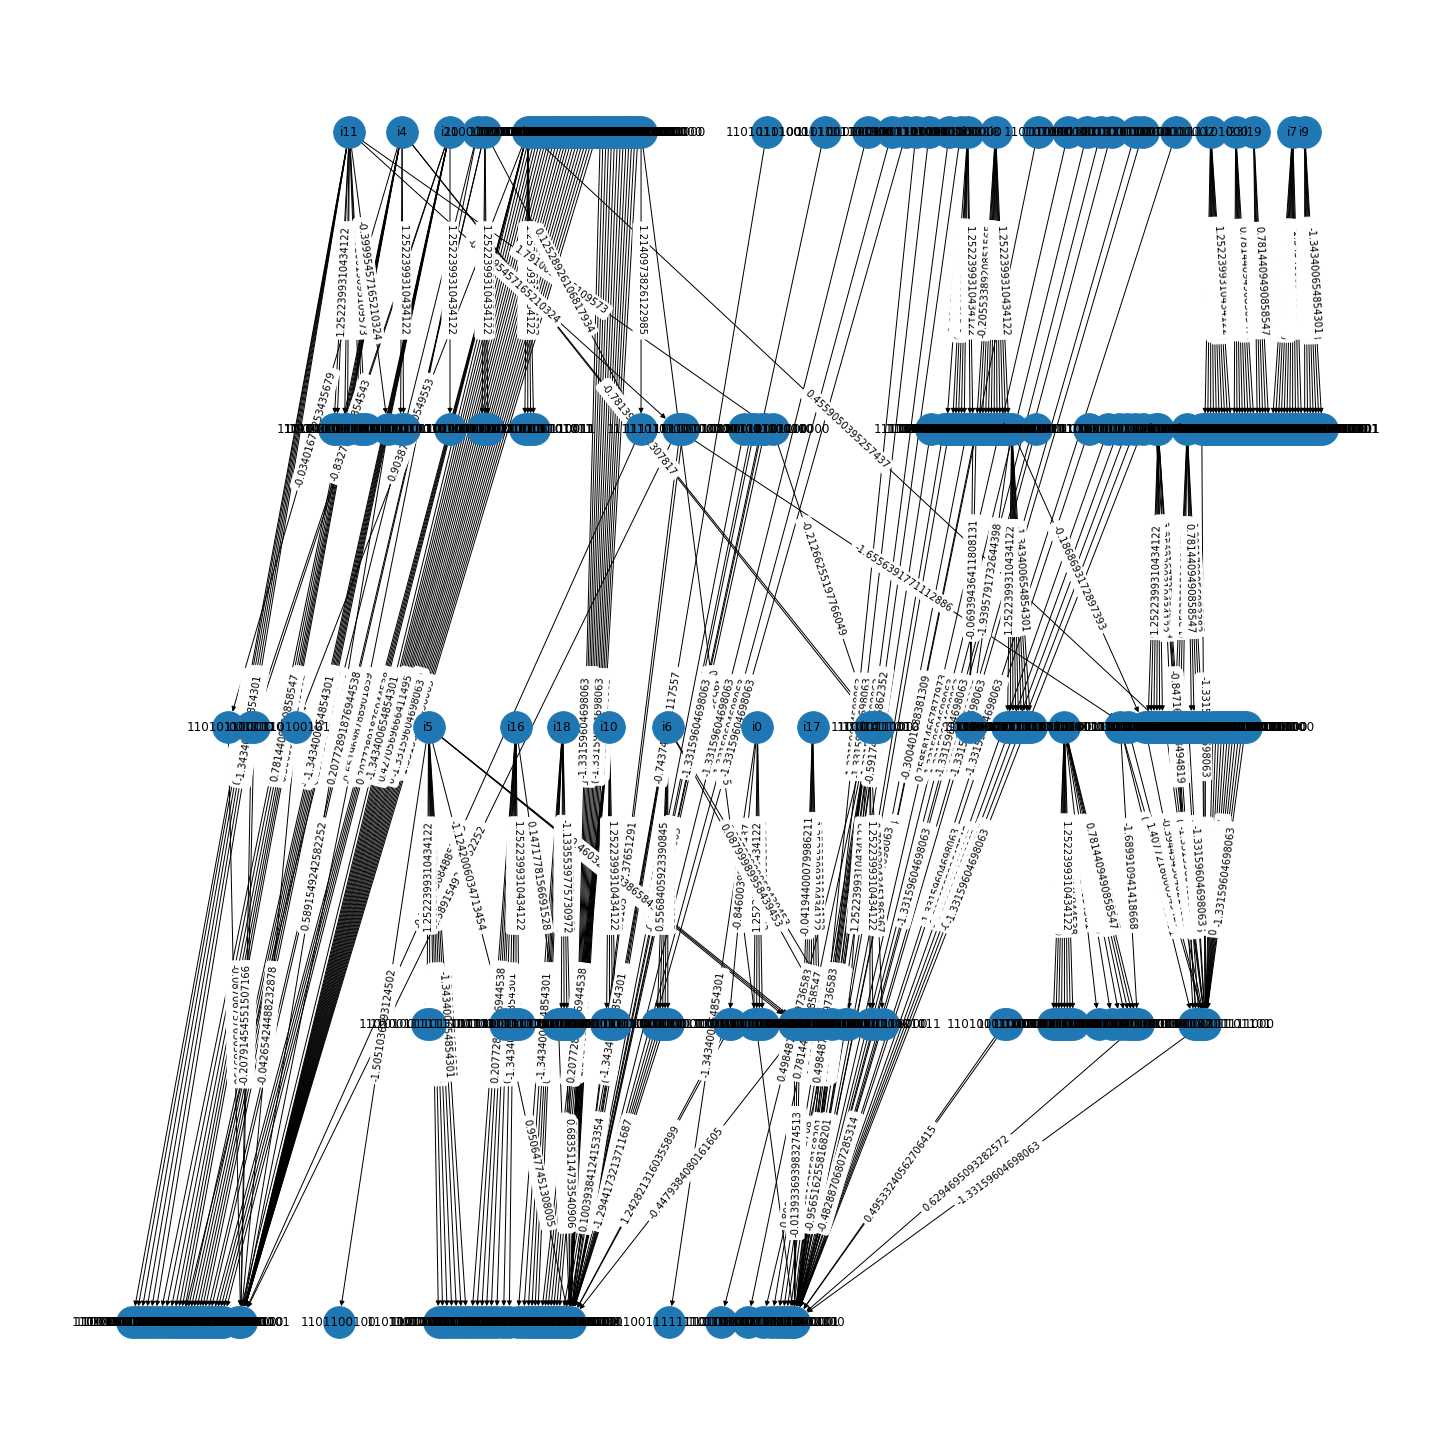

In [7]:
r1.execute()
v1.draw_nn()

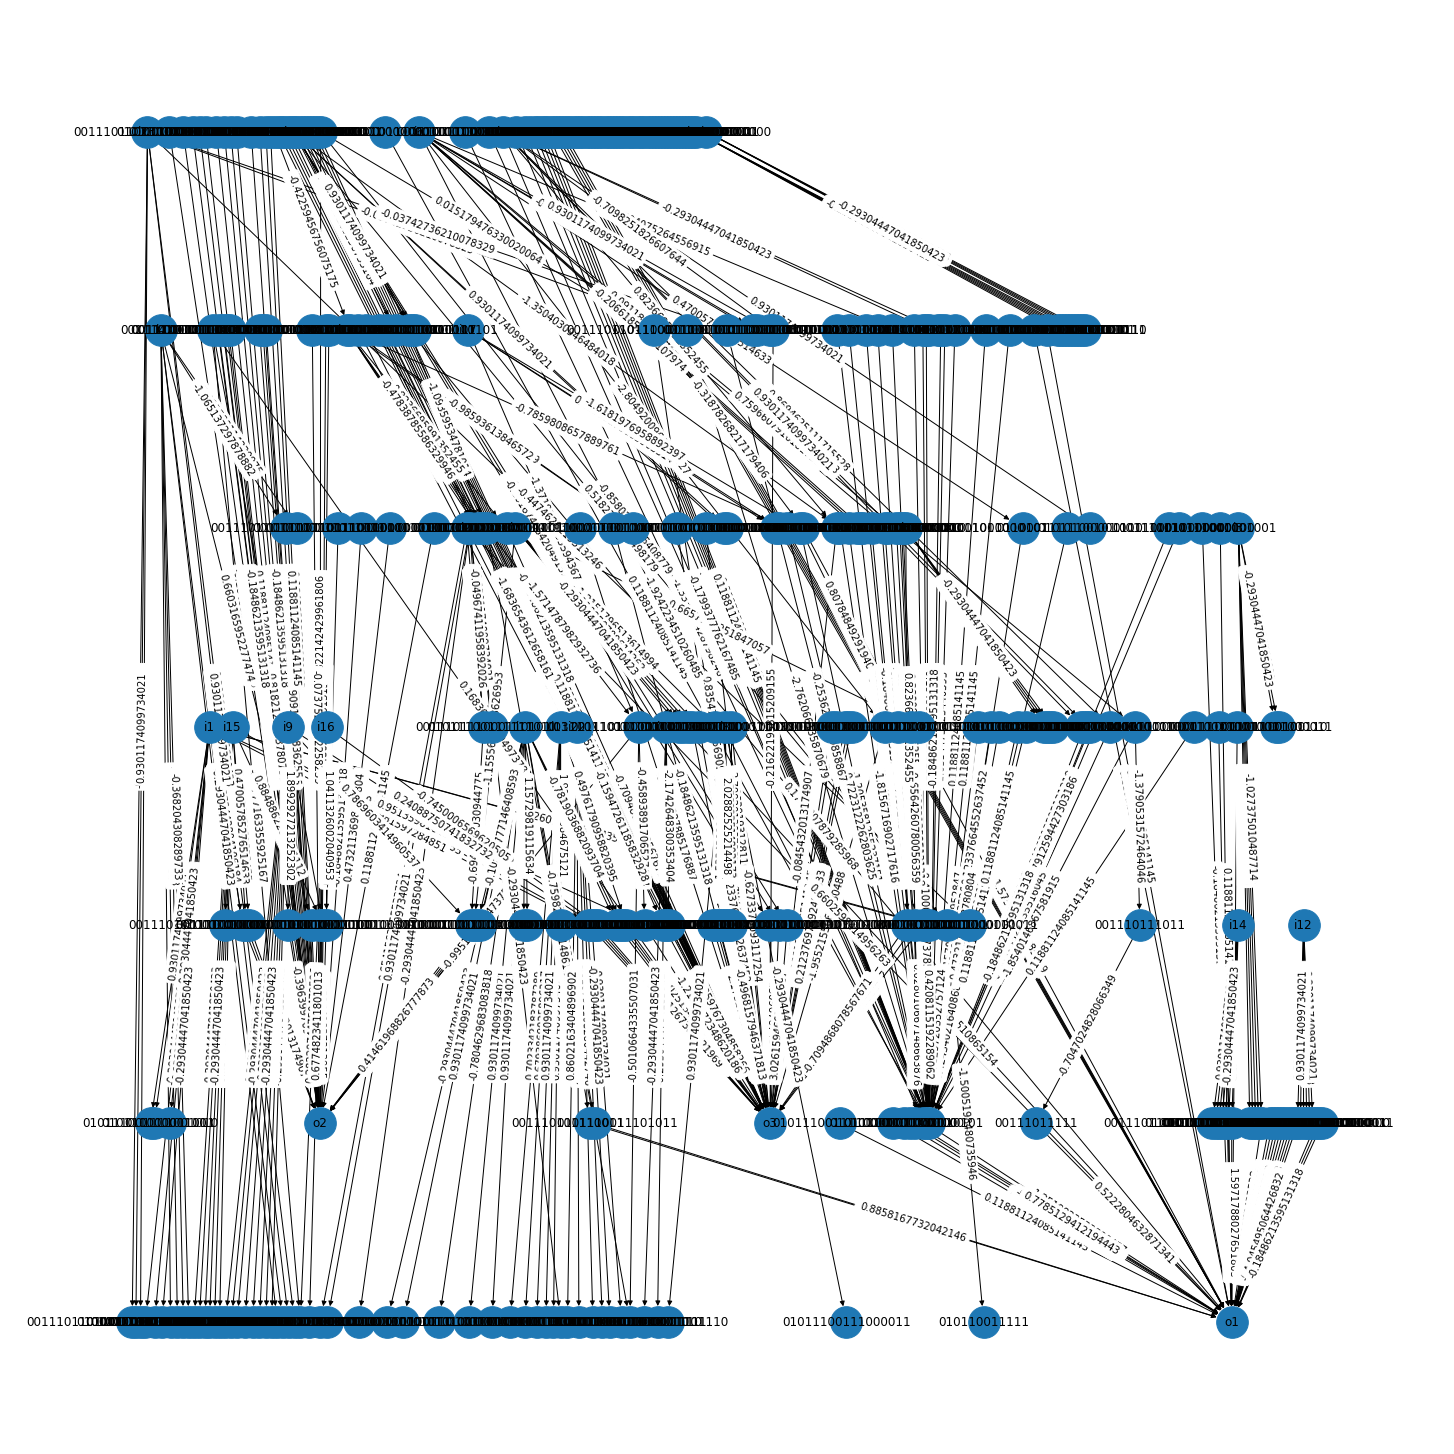

In [33]:
r2.execute()
v2.draw_nn()

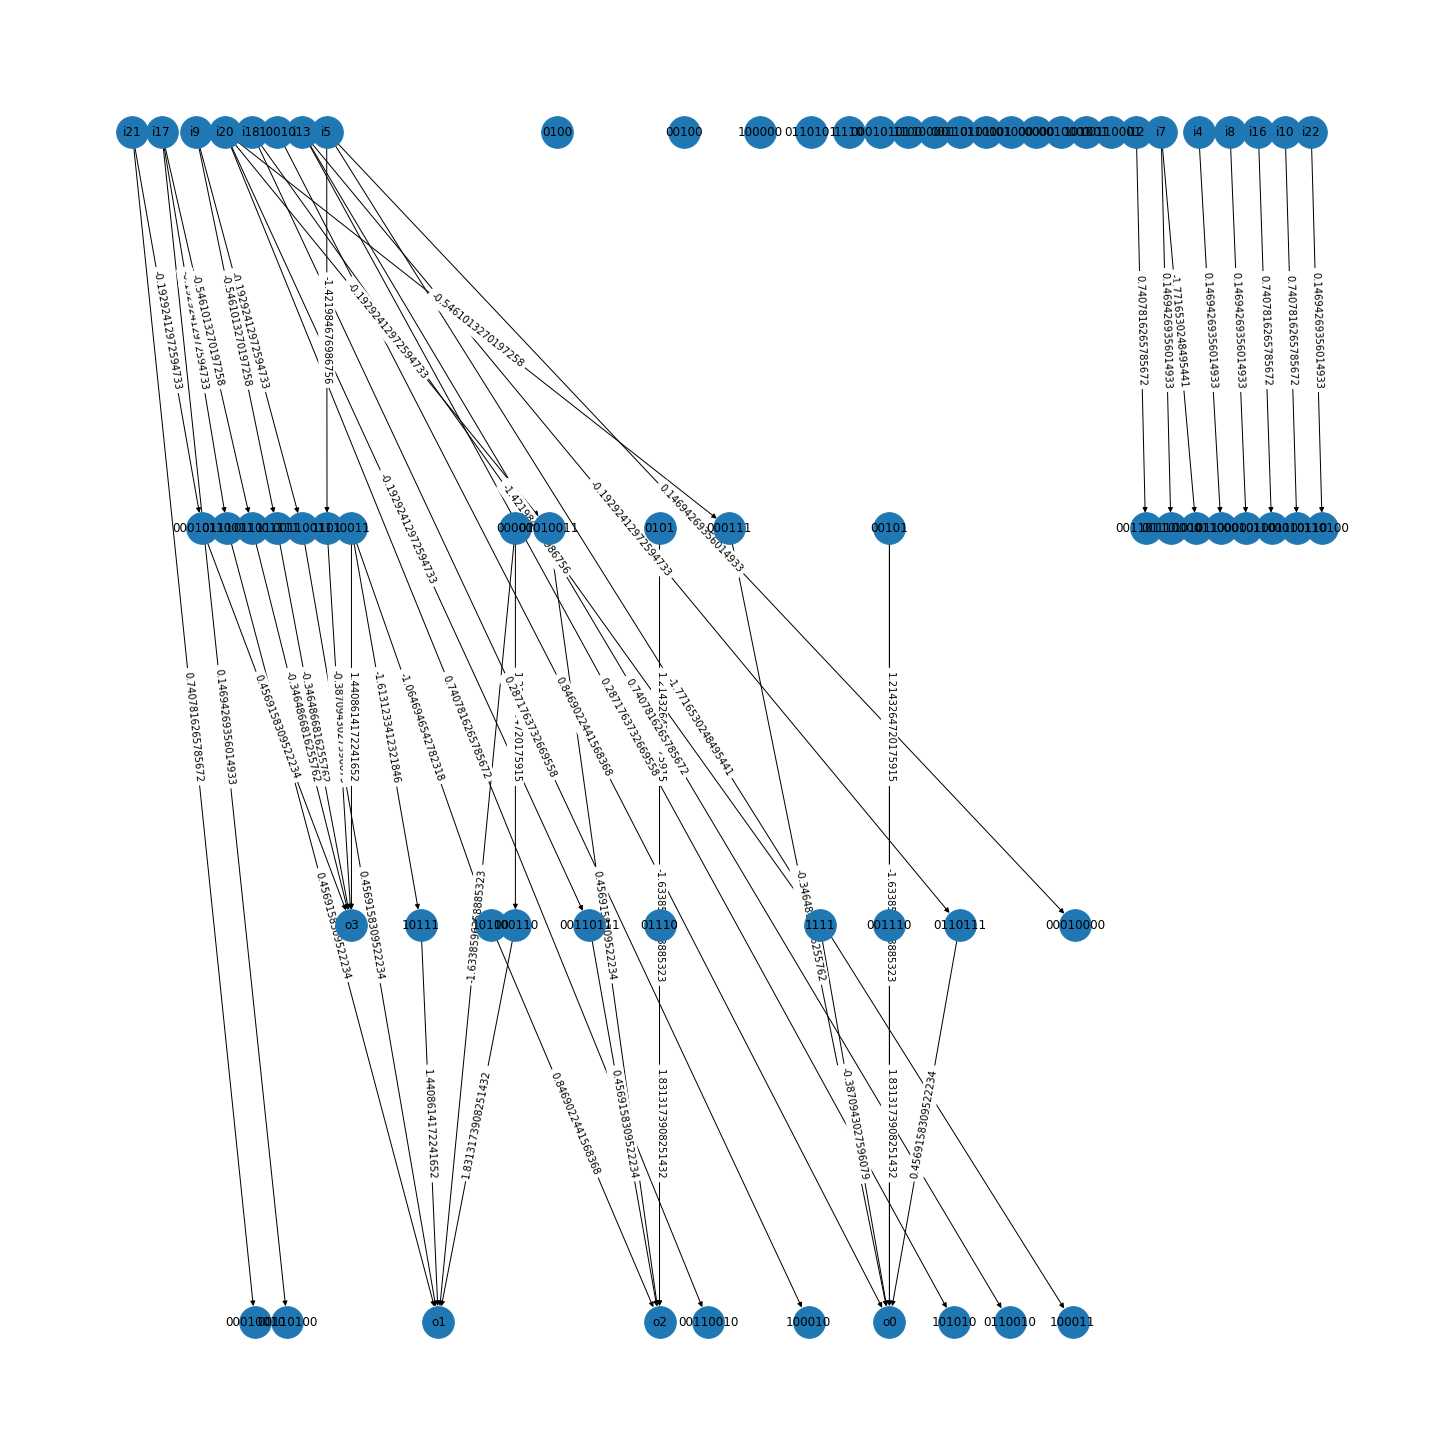

In [17]:
r2.execute()
v2.draw_nn()